In [1]:
from konlpy.tag import Okt

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
                           filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x246d9a29bd0>)

In [6]:
total_data = pd.read_table('ratings_total.txt', names = ['rating', 'reviews'])
total_data = total_data.head(10000)
total_data

,rating,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
9995,1,기대를 너무 많이했나봐요 ........ 일단 머릿결 상하신 분은 고민좀 해보세요 ...
9996,5,너무 귀엽고 폭신폭신하고 예뻐요
9997,1,눈뒤에 실거는부분이커서 다뜨고 눈을붙일수가없네요 ㅜ
9998,2,짜증 옷이 뒤틀려서 왔음. 짜증 ㄷ신ㅅㅇㅌㄹ츤ㅅㄴㅅㅌㅅ가ㅡㅡㅎㄱㄴㅅ듣ㅅㄱᆞㄷ쑈는핟ㅎ...


In [11]:
total_data['label'] = np.select([total_data.rating>3],[1], default = 0)
total_data['rating'].nunique()


# unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수입니다
#nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다. 

4

In [14]:
total_data['reviews'].nunique()

10000

In [16]:
total_data.drop_duplicates(subset=['reviews'], inplace= True)

#df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# subset : 중복값을 검사할 열 입니다. 기본적으로 모든 열을 검사합니다.
# keep : {first / last} 중복제거를할때 남길 행입니다. first면 첫값을 남기고 last면 마지막 값을 남깁니다.
# inplace : 원본을 변경할지의 여부입니다.
# ignore_index : 원래 index를 무시할지 여부입니다. True일 경우 0,1,2, ... , n으로 부여됩니다.

In [17]:
total_data

,rating,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
9995,1,기대를 너무 많이했나봐요 ........ 일단 머릿결 상하신 분은 고민좀 해보세요 ...,0
9996,5,너무 귀엽고 폭신폭신하고 예뻐요,1
9997,1,눈뒤에 실거는부분이커서 다뜨고 눈을붙일수가없네요 ㅜ,0
9998,2,짜증 옷이 뒤틀려서 왔음. 짜증 ㄷ신ㅅㅇㅌㄹ츤ㅅㄴㅅㅌㅅ가ㅡㅡㅎㄱㄴㅅ듣ㅅㄱᆞㄷ쑈는핟ㅎ...,0


In [87]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state= 42)

In [88]:
#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

# *arrays 길이/모양이 동일한 인덱서블 시퀀스[0]
# random_state 수치를 동일하게 해야 데이터가 바뀌는 일을 방지 할 수 있음

In [89]:
train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')

C:\Users\user\AppData\Local\Temp\ipykernel_2016\2219532687.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


In [90]:
train_data['reviews']

4901                       두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요
4375    진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698                           우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805    원래 이런 모양인가요  아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...
1101                      재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
                              ...                        
5734                      서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191                                    재구매 네번째 재구매 상품입니다
5390    핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...
860                                   사이즈도 정사이즈인거같고 핏도이뻐요
7270    배송지가 삼천포가 아닌 것 같네요 매우 실망입니다 맛도 년전에 지인을 통해 삼천포에...
Name: reviews, Length: 7500, dtype: object

In [91]:
test_data.drop_duplicates(subset = ['reviews'], inplace = True)
test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
test_data['reviews'].replace('', np.nan, inplace = True)
test_data = test_data.dropna()

C:\Users\user\AppData\Local\Temp\ipykernel_2016\2590264723.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


In [92]:
len(test_data)

2500

In [93]:
okt = Okt()

In [94]:
okt.pos('배송지가 삼천포가 아닌 것 같네요 매우 실망입니다 맛도 년전에 지인을 통해 삼천포에')

[('배송지', 'Noun'),
 ('가', 'Josa'),
 ('삼천포', 'Noun'),
 ('가', 'Josa'),
 ('아닌', 'Adjective'),
 ('것', 'Noun'),
 ('같네요', 'Adjective'),
 ('매우', 'Noun'),
 ('실망', 'Noun'),
 ('입니다', 'Adjective'),
 ('맛', 'Noun'),
 ('도', 'Josa'),
 ('년전', 'Noun'),
 ('에', 'Josa'),
 ('지인', 'Noun'),
 ('을', 'Josa'),
 ('통해', 'Noun'),
 ('삼천포', 'Noun'),
 ('에', 'Josa')]

In [95]:
len(train_data)

7500

In [96]:
train_data['NV'] = train_data['reviews']

In [97]:
train_data

,rating,reviews,label,NV
4901,4,두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요,1,두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요
4375,1,진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...,0,진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698,2,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ,0,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805,2,원래 이런 모양인가요 아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...,0,원래 이런 모양인가요 아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...
1101,5,재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다,1,재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
...,...,...,...,...
5734,5,서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요,1,서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191,5,재구매 네번째 재구매 상품입니다,1,재구매 네번째 재구매 상품입니다
5390,1,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...,0,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...
860,5,사이즈도 정사이즈인거같고 핏도이뻐요,1,사이즈도 정사이즈인거같고 핏도이뻐요


In [98]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', 
             '하', '고', '을', '를', '인', '듯', '과', '와', '네', 
             '들', '듯', '지', '임', '게']

In [99]:
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x:[item for item in x if item not in stopwords])

In [100]:
train_data

,rating,reviews,label,NV,tokenized
4901,4,두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요,1,두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요,"[두께, 좀, 얇네요, 물, 많이, 흡수, 할, 수, 있을까, 싶어요]"
4375,1,진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...,0,진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...,"[진짜, 별로, 마감, 별로, 규격, 너무, 벌어져서, 그, 사이, 로, 빗물, 아..."
6698,2,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ,0,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ,"[우리, 아이, 워낙, 손, 마니, 쓰는, 편이, 라, 금방, 뜯어, 버리네요, ㅠ]"
9805,2,원래 이런 모양인가요 아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...,0,원래 이런 모양인가요 아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...,"[원래, 이런, 모양, 인가요, 아무리, 봐도, 덜, 박은거, 같거든요, 바느질, ..."
1101,5,재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다,1,재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다,"[재구매, 매주, 주말, 술안주, 용, 으로, 주문, 해서, 맛있게, 먹고있습니다]"
...,...,...,...,...,...
5734,5,서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요,1,서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요,"[서랍, 정리, 진짜, 좋아요, 깔끔한게, 열, 때, 마다, 기분, 좋아요]"
5191,5,재구매 네번째 재구매 상품입니다,1,재구매 네번째 재구매 상품입니다,"[재구매, 번째, 재구매, 상품, 입니다]"
5390,1,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...,0,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...,"[핸드폰, 으로, 주문, 하다, 보니, 한자, 입력, 어려운데, 한글, 로, 문구,..."
860,5,사이즈도 정사이즈인거같고 핏도이뻐요,1,사이즈도 정사이즈인거같고 핏도이뻐요,"[사이즈, 정사, 이즈, 인거, 같고, 핏, 이뻐요]"


In [101]:
from collections import Counter

In [102]:
negartive_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)

In [103]:
negartive_words

array(['진짜', '별로', '마감', ..., '것', '과는', '다르군요'], dtype='<U48')

In [104]:
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [105]:
positive_words

array(['두께', '좀', '얇네요', ..., '같고', '핏', '이뻐요'], dtype='<U54')

In [106]:
negartive_words_count = Counter(negartive_words)

In [107]:
negartive_words_count

Counter({'진짜': 115,
         '별로': 269,
         '마감': 67,
         '규격': 4,
         '너무': 591,
         '벌어져서': 2,
         '그': 97,
         '사이': 16,
         '로': 287,
         '빗물': 2,
         '아': 70,
         '들어감': 2,
         '딱': 50,
         '맞지도': 3,
         '않고': 66,
         '정교하지도': 1,
         '않음': 13,
         '실리콘': 6,
         '으로': 279,
         '재': 17,
         '작업': 10,
         '해야하고': 2,
         '손': 50,
         '많이': 191,
         '감': 31,
         '우리': 14,
         '아이': 43,
         '워낙': 4,
         '마니': 6,
         '쓰는': 12,
         '편이': 19,
         '라': 75,
         '금방': 24,
         '뜯어': 13,
         '버리네요': 10,
         'ㅠ': 176,
         '원래': 29,
         '이런': 45,
         '모양': 19,
         '인가요': 17,
         '아무리': 21,
         '봐도': 16,
         '덜': 18,
         '박은거': 1,
         '같거든요': 1,
         '바느질': 10,
         '했다가': 2,
         '뜯어진': 2,
         '구멍': 43,
         '보이': 8,
         '제대로': 42,
         '검수': 19,
         

In [108]:
positive_words_count = Counter(positive_words)

In [109]:
positive_words_count

Counter({'두께': 17,
         '좀': 135,
         '얇네요': 1,
         '물': 21,
         '많이': 130,
         '흡수': 9,
         '할': 107,
         '수': 66,
         '있을까': 2,
         '싶어요': 8,
         '재구매': 472,
         '매주': 1,
         '주말': 5,
         '술안주': 1,
         '용': 82,
         '으로': 228,
         '주문': 187,
         '해서': 139,
         '맛있게': 22,
         '먹고있습니다': 6,
         '이뻐요': 75,
         '자주': 29,
         '구매': 359,
         '할겟': 1,
         '읍니': 4,
         '잘': 768,
         '먹겠습니다': 5,
         '낱개': 4,
         '포장': 115,
         '되어있어서': 4,
         '편리합니다': 7,
         '색': 42,
         '전': 42,
         '먹던것보다': 1,
         '진한데': 1,
         '어떤지': 2,
         '모르겠네요': 3,
         '가격': 238,
         '훨': 2,
         '저렴하긴한데': 1,
         '일단': 28,
         '상': 15,
         '판이': 3,
         '조금': 105,
         '약하긴한데': 1,
         '일부러': 1,
         '누르지': 1,
         '않는한': 1,
         '크고': 20,
         '좋아요': 684,
         '빠지고': 3,
         '식기세척

In [110]:
negartive_words_count.most_common(20)

[('안', 617),
 ('요', 594),
 ('너무', 591),
 ('배송', 449),
 ('그냥', 435),
 ('잘', 426),
 ('했는데', 294),
 ('로', 287),
 ('구매', 285),
 ('제품', 283),
 ('못', 280),
 ('으로', 279),
 ('별로', 269),
 ('좀', 264),
 ('하고', 261),
 ('생각', 250),
 ('ㅠㅠ', 243),
 ('사용', 243),
 ('보다', 235),
 ('만', 227)]

In [111]:
positive_words_count.most_common(20)

[('잘', 768),
 ('좋아요', 684),
 ('배송', 584),
 ('재구매', 472),
 ('너무', 443),
 ('구매', 359),
 ('요', 329),
 ('사용', 258),
 ('가격', 238),
 ('으로', 228),
 ('같아요', 224),
 ('좋네요', 218),
 ('보다', 198),
 ('입니다', 191),
 ('주문', 187),
 ('로', 186),
 ('제품', 183),
 ('빠르고', 177),
 ('때', 173),
 ('더', 166)]

긍정 리뷰의 평균 길이 : 10.81291700026688
부정 리뷰의 평균 길이 : 14.527045030642153


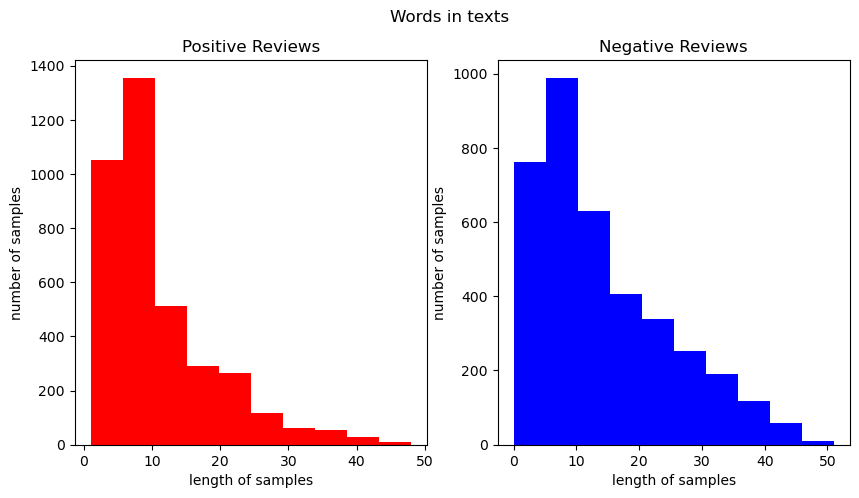

In [112]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [113]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)

In [114]:
test_data['tokenized'] = test_data['tokenized'].apply(lambda x : [item for item in x if item not in stopwords])

In [115]:
X_train = np.array(train_data['tokenized'])

In [116]:
y_train = np.array(train_data['label'])

In [117]:
X_test= np.array(test_data['tokenized'])

In [118]:
y_test = np.array(test_data['label'])

In [119]:
tokenizer = Tokenizer()

In [120]:
tokenizer.fit_on_texts(X_train)

In [121]:
tokenizer.word_index

{'잘': 1,
 '너무': 2,
 '배송': 3,
 '요': 4,
 '안': 5,
 '좋아요': 6,
 '재구매': 7,
 '구매': 8,
 '으로': 9,
 '사용': 10,
 '그냥': 11,
 '로': 12,
 '제품': 13,
 '했는데': 14,
 '보다': 15,
 '가격': 16,
 '하고': 17,
 '생각': 18,
 '좀': 19,
 '같아요': 20,
 '주문': 21,
 '입니다': 22,
 '맛': 23,
 '못': 24,
 '때': 25,
 '많이': 26,
 '만': 27,
 '해서': 28,
 '더': 29,
 '별로': 30,
 '것': 31,
 'ㅠㅠ': 32,
 '개': 33,
 '합니다': 34,
 '사이즈': 35,
 '에서': 36,
 '서': 37,
 '상품': 38,
 '거': 39,
 '포장': 40,
 '다른': 41,
 '좋네요': 42,
 '냄새': 43,
 '정말': 44,
 '하나': 45,
 '했어요': 46,
 '부분': 47,
 'ㅠ': 48,
 '진짜': 49,
 '빠르고': 50,
 '조금': 51,
 '할': 52,
 '나': 53,
 '제': 54,
 '넘': 55,
 '저': 56,
 '샀는데': 57,
 '인데': 58,
 '이라': 59,
 '구입': 60,
 '좋습니다': 61,
 '좋은': 62,
 '반품': 63,
 '또': 64,
 '사진': 65,
 '두': 66,
 '정도': 67,
 'ㅎㅎ': 68,
 '해': 69,
 '만족합니다': 70,
 '완전': 71,
 '느낌': 72,
 '아주': 73,
 '좋고': 74,
 '아직': 75,
 '딱': 76,
 '써': 77,
 '아이': 78,
 '맘': 79,
 '다시': 80,
 '엄청': 81,
 '감사합니다': 82,
 '중': 83,
 '면': 84,
 '에요': 85,
 '일': 86,
 '라': 87,
 '그': 88,
 '용': 89,
 '색상': 90,
 '비': 91,
 '디자인': 92,
 '효과': 93,

In [122]:
threshold = 2
total_cnt = len(tokenizer.word_index)
total_cnt

16865

In [123]:
tokenizer.word_index

{'잘': 1,
 '너무': 2,
 '배송': 3,
 '요': 4,
 '안': 5,
 '좋아요': 6,
 '재구매': 7,
 '구매': 8,
 '으로': 9,
 '사용': 10,
 '그냥': 11,
 '로': 12,
 '제품': 13,
 '했는데': 14,
 '보다': 15,
 '가격': 16,
 '하고': 17,
 '생각': 18,
 '좀': 19,
 '같아요': 20,
 '주문': 21,
 '입니다': 22,
 '맛': 23,
 '못': 24,
 '때': 25,
 '많이': 26,
 '만': 27,
 '해서': 28,
 '더': 29,
 '별로': 30,
 '것': 31,
 'ㅠㅠ': 32,
 '개': 33,
 '합니다': 34,
 '사이즈': 35,
 '에서': 36,
 '서': 37,
 '상품': 38,
 '거': 39,
 '포장': 40,
 '다른': 41,
 '좋네요': 42,
 '냄새': 43,
 '정말': 44,
 '하나': 45,
 '했어요': 46,
 '부분': 47,
 'ㅠ': 48,
 '진짜': 49,
 '빠르고': 50,
 '조금': 51,
 '할': 52,
 '나': 53,
 '제': 54,
 '넘': 55,
 '저': 56,
 '샀는데': 57,
 '인데': 58,
 '이라': 59,
 '구입': 60,
 '좋습니다': 61,
 '좋은': 62,
 '반품': 63,
 '또': 64,
 '사진': 65,
 '두': 66,
 '정도': 67,
 'ㅎㅎ': 68,
 '해': 69,
 '만족합니다': 70,
 '완전': 71,
 '느낌': 72,
 '아주': 73,
 '좋고': 74,
 '아직': 75,
 '딱': 76,
 '써': 77,
 '아이': 78,
 '맘': 79,
 '다시': 80,
 '엄청': 81,
 '감사합니다': 82,
 '중': 83,
 '면': 84,
 '에요': 85,
 '일': 86,
 '라': 87,
 '그': 88,
 '용': 89,
 '색상': 90,
 '비': 91,
 '디자인': 92,
 '효과': 93,